In [1]:
import data_frame
import models
import importlib
import evaluator as ev

2025-07-09 12:16:02.030325: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 12:16:02.030750: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-09 12:16:02.032674: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-09 12:16:02.036905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752056162.043594  623164 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752056162.04

In [2]:
filePath = "KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [17]:
df.data["MAG_GAAP_r"].max()

np.float32(26.32175)

In [ ]:
model = models.MLModelContext(strategy=models.ANNSingleGauss(df))
model.train()
model.test_predict()

2025-07-09 12:16:10.616599: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2025-07-09 12:16:10.616625: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-09 12:16:10.616629: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: borsuk
2025-07-09 12:16:10.616631: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: borsuk
2025-07-09 12:16:10.616727: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 570.133.7
2025-07-09 12:16:10.616749: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 5

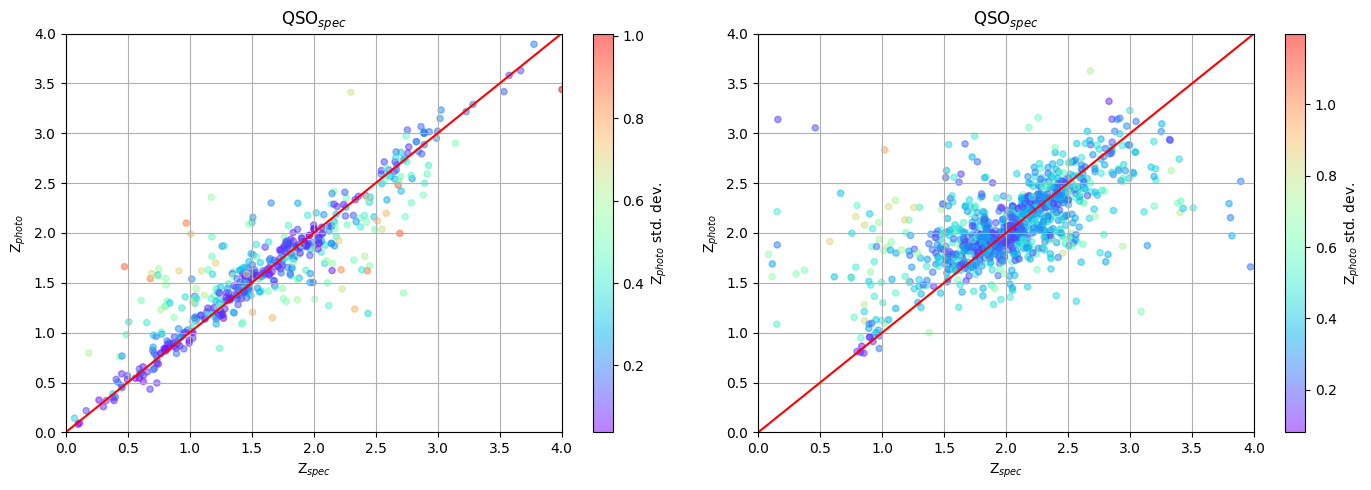

,MSE,R^2,Redshift error
test,0.091685,0.835143,"(0.015796328076552554, 0.1348749715809237)"
faint,0.213045,0.382934,"(0.018803158047840635, 0.1672785814893913)"


In [5]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_with_std_plot()
evaluator.evaluate_metrics()

In [7]:
df = data_frame.DataFrame(filePath, "GALAXY", data_frame.MaxFiller())

/home/kdrabicki/projekt/data_frame.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data = self.data.replace(VALUES_TO_FILL, np.nan)


In [8]:
model = models.MLModelContext(strategy=models.ANNSingleGauss(df))
model.train()
model.test_predict()

Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 16.


/home/kdrabicki/projekt/models.py:136: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.95437723 0.38674432 0.13957907 ... 1.1777089  1.1519033  0.11807299]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred"] = y_hat
/home/kdrabicki/projekt/models.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.07064646 0.03112825 0.03889818 ... 0.28418347 0.23559833 0.02139069]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred_std"] = y_std


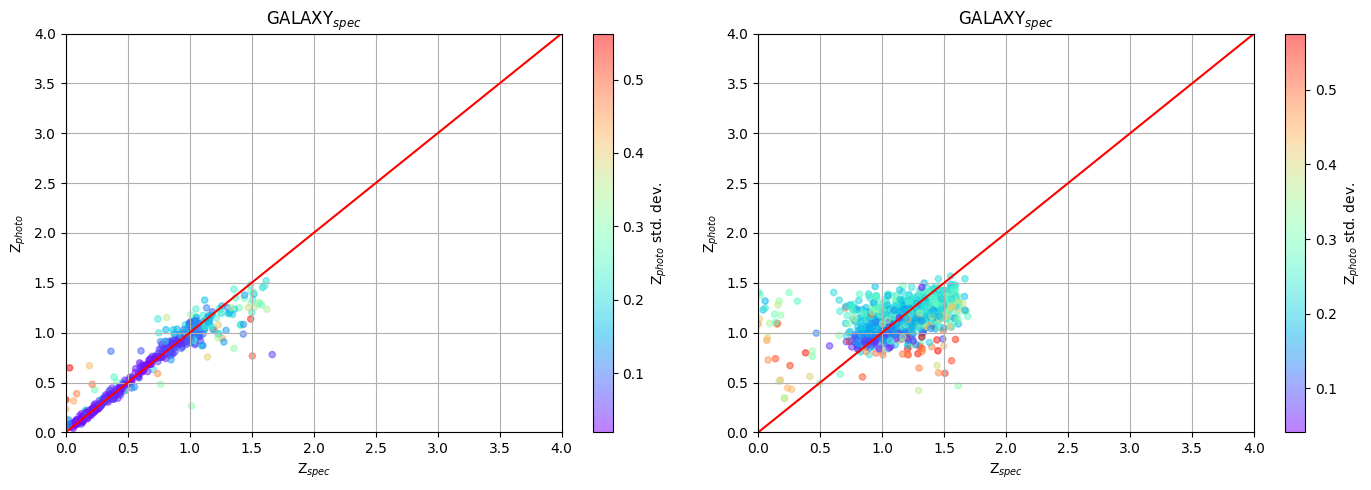

,MSE,R^2,Redshift error
test,0.025601,0.860413,"(0.00875386664236363, 0.10023315392041834)"
faint,0.072551,0.19703,"(0.019627439059195045, 0.17658488244819684)"


In [15]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_with_std_plot()
evaluator.evaluate_metrics()